# 数据探索分析
- 1.查看数据整体情况
- 2.缺失值分析
- 3.异常值分析
- 4.标签分布分析
- 5.分析特征跟标签的相关性（热力图）
- 6.分析特征的分布情况（直方图-QQ图）
- 7.分析特征跟标签的回归关系（直方图-散点图）
- 8.输出分析报告（pandas_profiling）

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) #显示所有列
pd.set_option('display.max_rows', None) #显示所有行

## 读取数据

In [10]:
data = pd.read_csv('data/input/high_diamond_ranked_10min.csv')
target_name = 'blueWins'
target = data[target_name]
feature = data.drop([target_name], axis=1)

## 查看数据整体情况

In [11]:
feature.shape

(9879, 39)

In [12]:
target.shape

(9879,)

In [13]:
feature.dtypes

gameId                            int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


In [14]:
feature.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [15]:
feature.describe()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## 缺失值分析

In [16]:
feature.isnull().sum() / feature.isnull().count()

gameId                          0.0
blueWardsPlaced                 0.0
blueWardsDestroyed              0.0
blueFirstBlood                  0.0
blueKills                       0.0
blueDeaths                      0.0
blueAssists                     0.0
blueEliteMonsters               0.0
blueDragons                     0.0
blueHeralds                     0.0
blueTowersDestroyed             0.0
blueTotalGold                   0.0
blueAvgLevel                    0.0
blueTotalExperience             0.0
blueTotalMinionsKilled          0.0
blueTotalJungleMinionsKilled    0.0
blueGoldDiff                    0.0
blueExperienceDiff              0.0
blueCSPerMin                    0.0
blueGoldPerMin                  0.0
redWardsPlaced                  0.0
redWardsDestroyed               0.0
redFirstBlood                   0.0
redKills                        0.0
redDeaths                       0.0
redAssists                      0.0
redEliteMonsters                0.0
redDragons                  

## 异常值分析

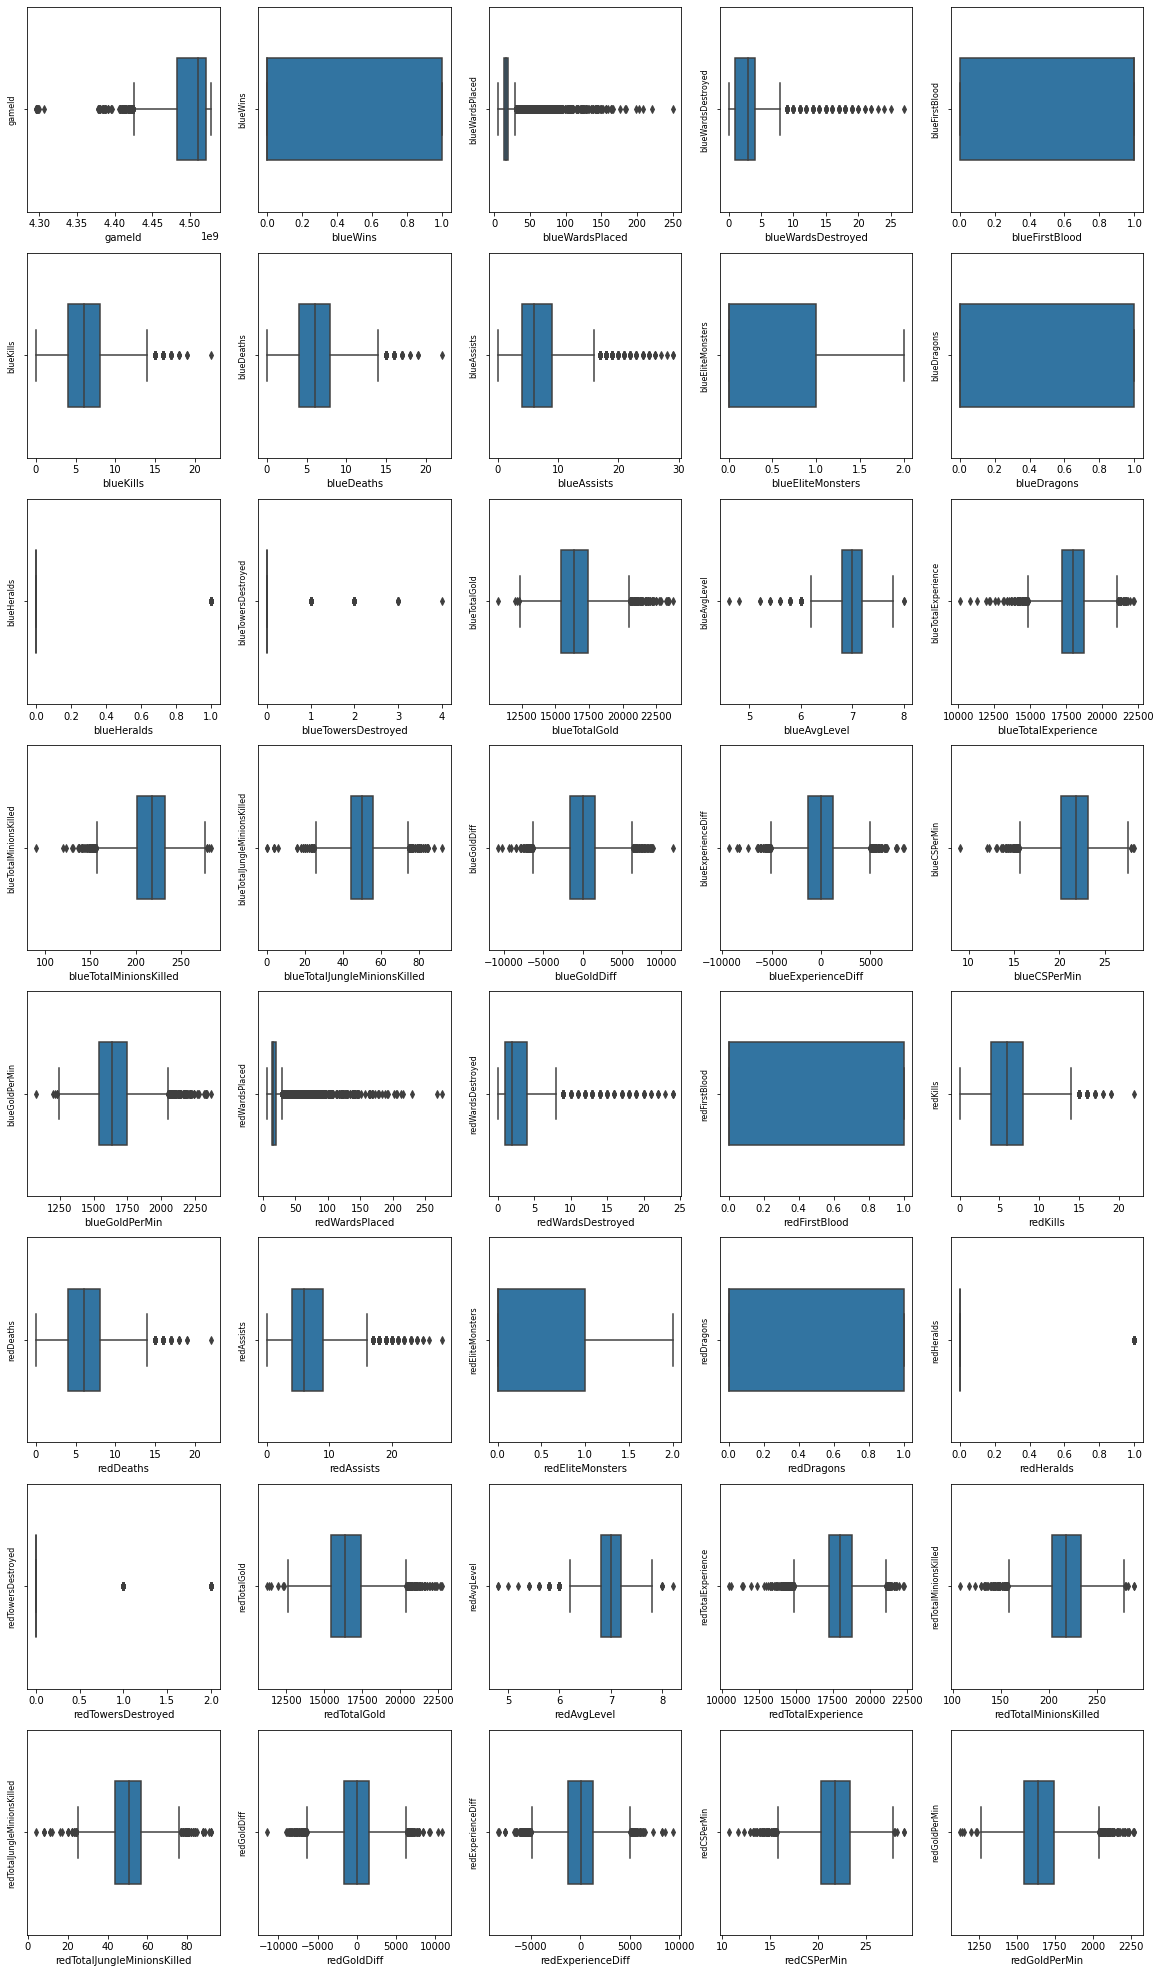

In [17]:
# 画箱式图
column = data.columns.tolist()[:]  # 列表头
column_num = len(column)
fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(column_num):
    plt.subplot(column_num/5+1, 5, i + 1) 
    sns.boxplot(data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.show()

## 标签分布分析

In [18]:
pd.Series(target).value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

## 分析特征跟标签的相关性（热力图）

In [19]:
def data_correlation(feature):
    k = 10  # number of variables for heatmap
    train_corr = feature.corr()
    cols = train_corr.nlargest(k, 'target')['target'].index
    cm = np.corrcoef(feature[cols].values.T)
    hm = plt.subplots(figsize=(10, 10))  # 调整画布大小
    hm = sns.heatmap(feature[cols].corr(), annot=True, square=True)
    plt.show()

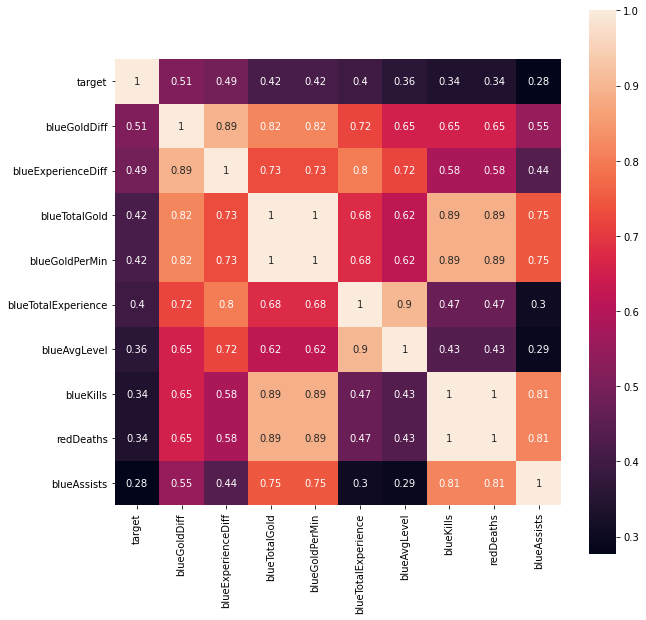

In [20]:
data = feature
data['target'] = target
data_correlation(data)

In [26]:
train_corr = feature.corr()
related_features = train_corr[abs(train_corr) > 0.5]
type(related_features)
related_features

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,target
gameId,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWardsPlaced,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWardsDestroyed,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueFirstBlood,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueKills,NaN,NaN,NaN,NaN,1.000000,NaN,0.813667,NaN,NaN,NaN,NaN,0.888751,NaN,NaN,NaN,NaN,0.654148,0.583730,NaN,0.888751,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.654148,-0.583730,NaN,NaN,NaN
blueDeaths,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.640000,-0.577613,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.804023,NaN,NaN,NaN,NaN,0.885728,NaN,NaN,NaN,NaN,0.640000,0.577613,NaN,0.885728,NaN
blueAssists,NaN,NaN,NaN,NaN,0.813667,NaN,1.000000,NaN,NaN,NaN,NaN,0.748352,NaN,NaN,NaN,NaN,0.549761,NaN,NaN,0.748352,NaN,NaN,NaN,NaN,0.813667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.549761,NaN,NaN,NaN,NaN
blueEliteMonsters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.781039,0.640271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueDragons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781039,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.506546,-0.631930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueHeralds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640271,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def pearson_corr(df, label):
    feature_corr = {}
    for f in df:
        df_tmp = df[df[f].notnull()]
        col = df_tmp[f].corr(df_tmp[label], method='pearson')
        feature_corr[f] = col
        
    corr_list = sorted(feature_corr.items(), key=lambda kv: (-kv[1], kv[0]))
    for t in corr_list:
        print(t)

In [38]:
pearson_corr(data, 'target')

('target', 1.0)
('blueGoldDiff', 0.5111190551762509)
('blueExperienceDiff', 0.48955791655969827)
('blueTotalGold', 0.41721255829218024)
('blueGoldPerMin', 0.4172125582921801)
('blueTotalExperience', 0.3961407056514395)
('blueAvgLevel', 0.3578198468989075)
('blueKills', 0.3373576105342436)
('redDeaths', 0.3373576105342436)
('blueAssists', 0.2766849645392137)
('blueTotalMinionsKilled', 0.22490947260651548)
('blueCSPerMin', 0.22490947260651545)
('blueEliteMonsters', 0.22194419452743802)
('blueDragons', 0.21376769276290764)
('blueFirstBlood', 0.20176926438571097)
('blueTotalJungleMinionsKilled', 0.13144491466164812)
('blueTowersDestroyed', 0.11556646320823948)
('blueHeralds', 0.09238472474731765)
('blueWardsDestroyed', 0.044246803571579084)
('gameId', 0.000985127862727931)
('blueWardsPlaced', 8.695109201395485e-05)
('redWardsPlaced', -0.023671238287740017)
('redWardsDestroyed', -0.05540030842294122)
('redHeralds', -0.09717188056275666)
('redTowersDestroyed', -0.10369562570246879)
('redTota

## 分析特征的分布情况（直方图-QQ图）

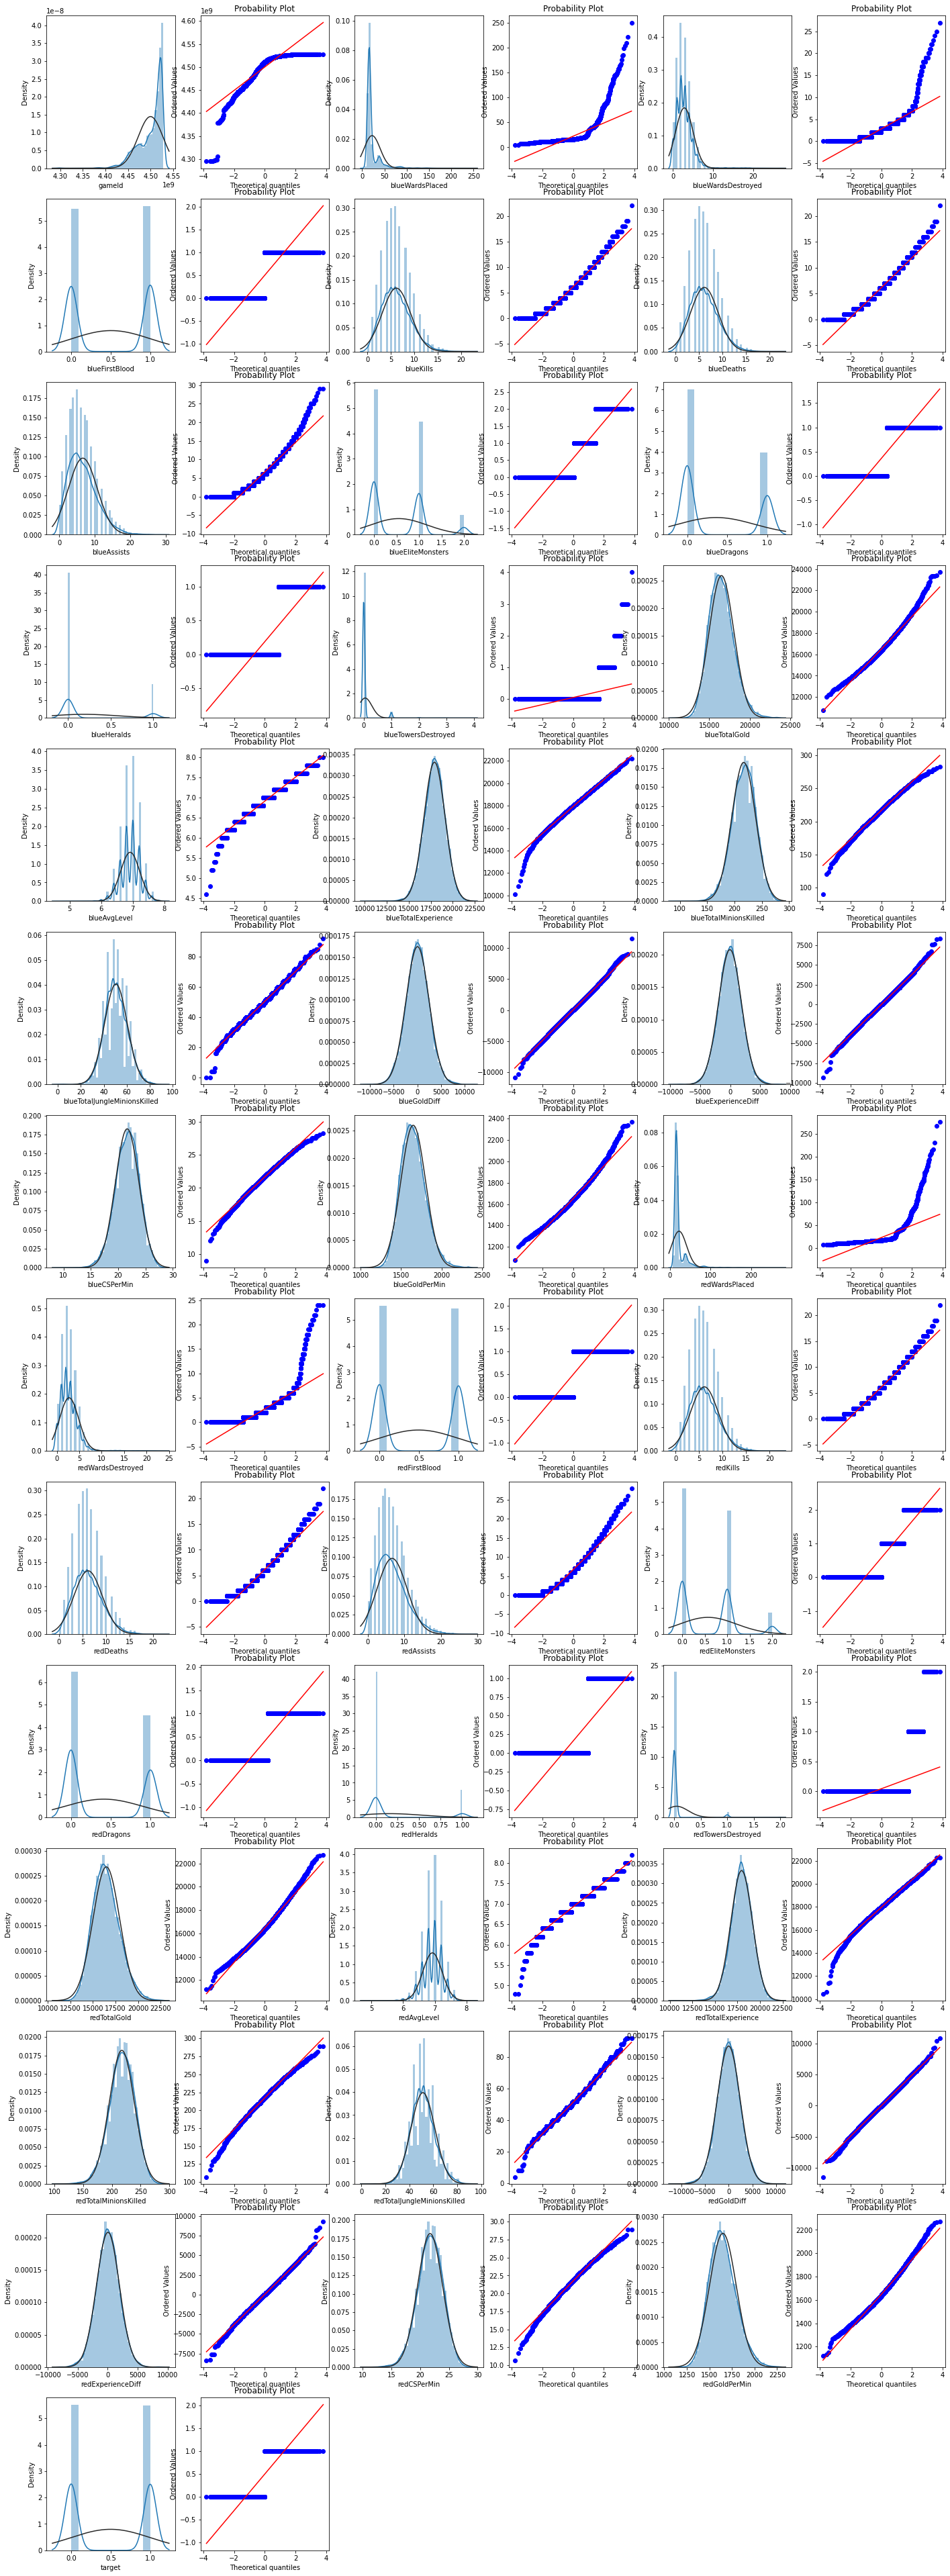

In [39]:
train_cols = 6
train_rows = len(data.columns)
plt.figure(figsize=(4*train_cols,5*train_rows))

i=0
for col in data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(data[col], plot=plt)
plt.show()

## 分析特征跟标签的回归关系（直方图-散点图）

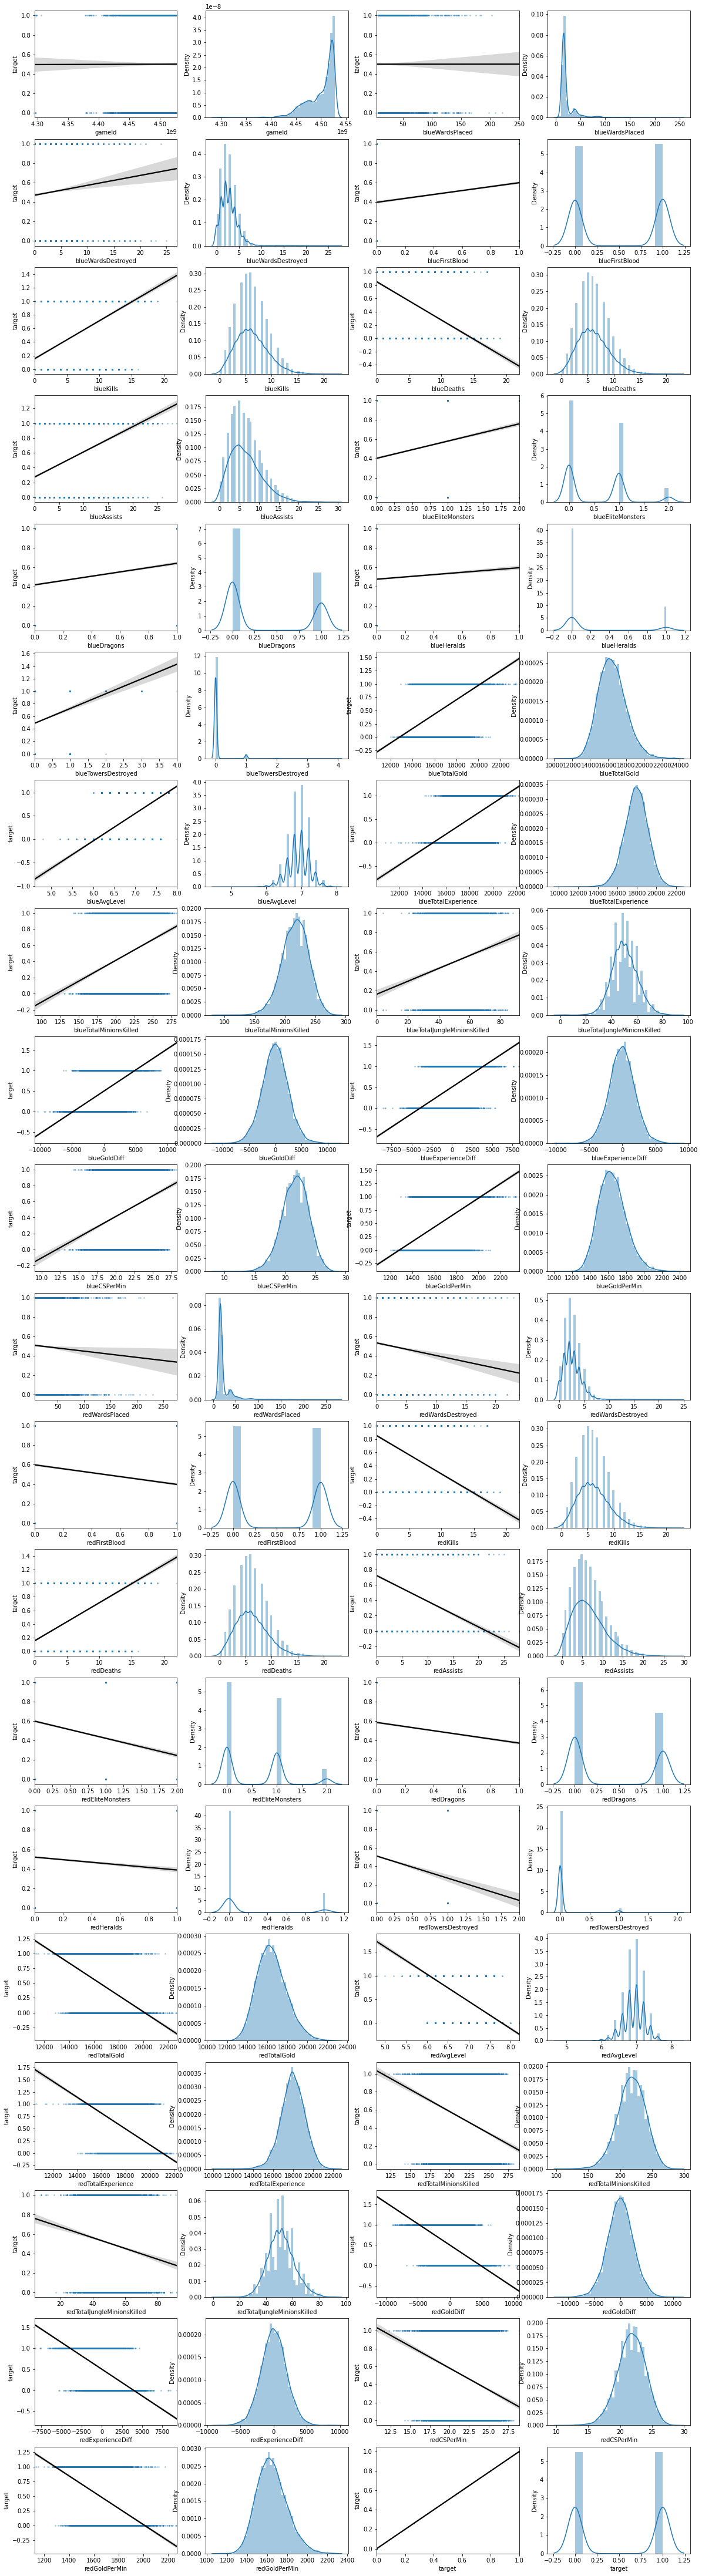

In [40]:
fcols = 4
frows = len(data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(data[col].dropna())
    plt.xlabel(col)

## 输出分析报告（pandas_profiling）

In [41]:
import pandas_profiling

pfr = pandas_profiling.ProfileReport(data)
pfr.to_file("./data_explore_report.html")

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]